<a href="https://colab.research.google.com/github/MinhLe2502/UTS_ML2019_ID13005158/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Assessment 2: Algorithm Implementation - ID3 Decision Tree Algorithm***

Name: Quang Nhat Minh Le

ID:13005158

##**Introduction**

    ID3 decision tree is an algorithm invented by Ross Quinlan, and it is a tree, each root node is beginning with a condition, and each child note is a decision to the condition of the root node. ID3 decision tree typically used in the machine learning and natural language processing domains.

    In this report, we will use two different training sets as the input. Both training sets contain the same number of attributes and have the same name. However, one training set contains only categorical attributes; the other training set includes both quantitative and categorical attributes.

    Through analysing the training sets and through training the classifier to produce a decision tree, then we need interpret the testing set to get the result, which is the output.


##**Exploration**

###**Challanges**

    Decision tree is heavily depending on the source of information, and decision tree cannot work well with super attributes. When working with super attributes, the algorithm may pick the super attributes as the root node, which may create a perfect classifier, but the algorithm will process ineffectively on unseen data.
    
    Decision tree is a sophisticated algorithm. To calculate the best split of data, the algorithm needs to compute the probabilities of different possibilities and then compute the weights and Gini impurity to create a decision tree. Also, a decision tree only can process one single data field at a time, which makes decision tree is time-consuming.
    
    Decision tree is also unproductive when working with quantitative super attributes variable. A decision tree can only work well with quantitative attributes with a small number of values. To optimize the decision tree with super quantitative attributes, it requires an extensive training set. 

    Decision tree is also limited in the analysis. Decision tree is incapable of predicting continuous values and estimate decision and values for continuous attributes. In addition, because decision tree can only process one single data filed at a time which can increase the possibility with duplicate sub-tree on different paths.


###**Data Structures**

<img src="https://github.com/MinhLe2502/UTS_ML2019_ID13005158/raw/master/Training%20set%201%20model.jpg" height="400" width="700"/>


$$Training\ set\ 1\ Data\ Structures$$

<img src="https://github.com/MinhLe2502/UTS_ML2019_ID13005158/raw/master/Training%20set%202%20model.jpg" height="400" width="700"/>


$$Training\ set\ 2\ Data\ Structures$$

###**Implentation Plan**

    Decision Tree does not work well with quantitative attributes. To solve that problem, I define a range of quantitative values by categorical values. In the training set, I convert the range of 0 - 5 as No to Exercises and No to Eat Fastfood. 6 - 10 as Yes to Exercises and Yes to Eat Fastfood.
    
    To build a decision tree, first, I have to partition the data. The best way to partition a data is to divide the data set base on its feature. So, I create a question class. The method is by iterate through the data set. It transfers the data which have the same feature through the match_rows with a match function and different feature to a mismatch_rows.
    
    Then I find the Gini impurity. Gini Impurity is a formula to calculate the chance which the user with label incorrectly a randomly chosen data point. After that, I find the info_gain, info_gain is used to calculate the information which the user will get from a data point when analyse another data point.
    
    Then I split the data into different parts by checking every data point. I partition the data by moving the match data points to match_rows and the other to mismatch_rows.
    
    I create a class called Leaf; this class hold a feature appears in the rows from the training data. And a class called Decision_Node, this class holds the question and to the two arrays match_rows and mismatch_rows
    
    After I have the leaf and the decision nodes, I build a tree using recursion. First, I split the data which has the feature of highest frequency then continue that step until no more question can be asked. When there is no more question, we partition the data set to match_rows and mismatch_rows. And apply these steps with the mismatch rows till no question can be asked.


##**Methodology**

In [0]:
from __future__ import print_function

In [0]:
#Training dataset 1
#First three column: Gender - Exercise - Eat Fastfood
#Exercise in the first training set is Yes or No
#Eat Fastfood in the first training set is Yes or No
#Last column is determine is what type of Body Measurments
training_data_1 = [
    ['Male', 'Yes', 'No', 'Fit'],
    ['Male', 'Yes', 'Yes', 'Average'],
    ['Male', 'No', 'Yes', 'Unfit'],
    ['Male', 'No', 'No', 'Average'],
    ['Female', 'Yes', 'No', 'Fit'],
    ['Female', 'Yes', 'Yes', 'Average'],
    ['Female', 'No', 'Yes', 'Unfit'],
    ['Female', 'No', 'No', 'Fit']
]

In [0]:
#Training dataset 2
#First three column: Gender - Exercise - Eat Fastfood
#Exercise in the second training set is average hour per week
#Eat Fastfood is the number of times in one week
#Last column is determine is what type of Body Measurments
training_data_2 = [
    ['Male', 10, 2, 'Fit'],
    ['Male', 6, 7, 'Average'],
    ['Male', 0, 8, 'Unfit'],
    ['Male', 0, 4, 'Average'],
    ['Female', 10, 1, 'Fit'],
    ['Female', 6, 8, 'Average'],
    ['Female', 0, 9, 'Unfit'],
    ['Female', 0, 2, 'Average']
]

In [0]:
#Define header for each column
header = ['Gender','Exercises','Eat FastFood','Body Measurments']

In [0]:
def class_counts(rows):
    #Counts the number of each type of example in a dataset.
    #Create a dictionary to store each feature of each column
    counts = {}
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] = counts[label] + 1
    return counts

In [0]:
class Question:

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if (isinstance(val, int) or isinstance(val, float)): #If the value is numeric
          return val >= int(self.value)
        else:
          return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if isinstance(self.value, int) or isinstance(self.value, float): #If the value is numeric
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [0]:
def partition(rows, question):
    #this method is to partition the dataset, if the rows value match with the question value
    #then add to match_rows array, otherwise, add to mismatch_rows
    match_rows, mismatch_rows = [], []
    for row in rows:
        if question.match(row):
            match_rows.append(row)
        else:
            mismatch_rows.append(row)
    return match_rows, mismatch_rows

**Gini Impurity**
    
    Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. It’s calculated as
    
>$G=\sum_{i=1}^C p(i)*(1-p(i))$

    Where C is the number of classes and p(i)p(i) is the probability of randomly picking an element of class ii.

    When training a decision tree, the best split is chosen by maximizing the Gini Gain, which is calculated by subtracting the weighted impurities of the branches from the original impurity.

In [0]:
def gini(rows):
    #calculate gini impurity
    counts = class_counts(rows)
    impurity = 1
    #itertaor through all labels 
    for labels in counts:
        #Probabilty is the number of one type of label / sum of all labels
        probablity = counts[labels] / float(len(rows))
        #gini_impurity is by minus the intital impurity - probability**2
        impurity = impurity - probablity**2
    return impurity

In [0]:
def info_gain(left, right, gini_impurity):
    ##Subtracting the weighted impurities of the branches from the original impurity.
    p = float(len(left)) / (len(left) + len(right))
    return gini_impurity - p * gini(left) - (1 - p) * gini(right)

In [0]:
def find_best_split(rows):
    #By iterating through every feaure of of each column, we calculate the inforation gain
    best_gain = 0         # temporary store the best info_gain
    best_question = None  # temporary store the feature which relevant to info_gain
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # length of column

    for col in range(n_features):
        values = set([row[col] for row in rows])
        for val in values:
            question = Question(col, val)
            match_rows, mismatch_rows = partition(rows, question)

            # Skip this split if it doesn't divide the dataset.
            if len(match_rows) == 0 or len(mismatch_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(match_rows, mismatch_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain > best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [0]:
class Leaf:
    #this class hold the the directory of each feature

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [0]:
class Decision_Node:
    #a decision nodes hold a referces to two child nodes

    def __init__(self,
                 question,
                 match_branch,
                 mismatch_branch):
        self.question = question
        self.match_branch = match_branch
        self.mismatch_branch = mismatch_branch

In [0]:
def build_tree(rows):
    #devide the data set base on each unique values, calculate the info_gain 
    #and return the highest best_gain
    gain, question = find_best_split(rows)

    #if all features had been loop through, so no more gain then return a leaf
    if gain == 0:
        return Leaf(rows)

    #By using question fuctions, we partition the data set based on which feature
    #matches the questions.
    match_rows, mismatch_rows = partition(rows, question)

    # Recursively build the match branch.
    match_branch = build_tree(match_rows)

    # Recursively build the mismatch branch.
    mismatch_branch = build_tree(mismatch_rows)

    return Decision_Node(question, match_branch, mismatch_branch)

In [0]:
def print_tree(node, spacing=""):

    # By partition and calculate the entrpopy, we use the feature has the most 
    #info_gain as the start node
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the match branch
    print (spacing + '--> True:')
    print_tree(node.match_branch, spacing + "  ")

    # Call this function recursively on the mismatch branch
    print (spacing + '--> False:')
    print_tree(node.mismatch_branch, spacing + "  ")

In [0]:
my_tree_1 = build_tree(training_data_1)
my_tree_2 = build_tree(training_data_2)

In [0]:
print_tree(my_tree_1)

Is Eat FastFood == Yes?
--> True:
  Is Exercises == Yes?
  --> True:
    Predict {'Average': 2}
  --> False:
    Predict {'Unfit': 2}
--> False:
  Is Gender == Male?
  --> True:
    Is Exercises == Yes?
    --> True:
      Predict {'Fit': 1}
    --> False:
      Predict {'Average': 1}
  --> False:
    Predict {'Fit': 2}


In [0]:
print_tree(my_tree_2)

Is Exercises >= 10?
--> True:
  Predict {'Fit': 2}
--> False:
  Is Eat FastFood >= 8?
  --> True:
    Is Exercises >= 6?
    --> True:
      Predict {'Average': 1}
    --> False:
      Predict {'Unfit': 2}
  --> False:
    Predict {'Average': 3}


##**Evaluation**

###**Report execution on data**

####Question 

From the class Question, we can partition the data set by using the match method to compare the feature in the data set with the feaure in the question

In [0]:
#Demo
#If the feature is a quantitative value
Question (1,3)

Is Exercises >= 3?

In [0]:
#If the feature is a categorical value
Question (1,'Yes')

Is Exercises == Yes?

####Partitioning

Based on which feature of the data set match with the feature in the question, we can partition the data set in two parts, one side contains row which had the feature match with question, and the other part contain row which feature do not match with the question

In [0]:
#Demo
#This partition divide data set whenther the rows contain Yes to going exercise
match_rows, mismatch_rows = partition(training_data_1, Question(1,'Yes'))
match_rows #this contain all rows which is yes to exercise

[['Male', 'Yes', 'No', 'Fit'],
 ['Male', 'Yes', 'Yes', 'Average'],
 ['Female', 'Yes', 'No', 'Fit'],
 ['Female', 'Yes', 'Yes', 'Average']]

In [0]:
mismatch_rows #this contain all remianing rows

[['Male', 'No', 'Yes', 'Unfit'],
 ['Male', 'No', 'No', 'Average'],
 ['Female', 'No', 'Yes', 'Unfit'],
 ['Female', 'No', 'No', 'Fit']]

In [0]:
#Demo
#This partition divide data set whenther the rows contain doing exercis >5 hours a week
match_rows, mismatch_rows = partition(training_data_2, Question(1,5))
match_rows #this contain all rows doing exercis >5 hours a week

[['Male', 10, 2, 'Fit'],
 ['Male', 6, 7, 'Average'],
 ['Female', 10, 1, 'Fit'],
 ['Female', 6, 8, 'Average']]

In [0]:
mismatch_rows #this contain all remianing rows

[['Male', 0, 8, 'Unfit'],
 ['Male', 0, 4, 'Average'],
 ['Female', 0, 9, 'Unfit'],
 ['Female', 0, 2, 'Average']]

####Gini Impurity and Information Gain

Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset.

The data set has not been divided yet so we calculate gini impurity by using the whole data points.

C is the number of class, p(1) is the probability of picking 'Fit', p(2) is the probability of picking 'Unfit', p(3) is the probability of picking 'Average', G is Gini Impurity.

$C = 3$

$p(1) = 2/8 = 0.25$

$p(2) = 2/8 = 0.25$

$p(3) = 4/8 = 0.5$

$G= p(1)*(1-p(1))+p(2)*(1-p(2))+p(3)*(1-p(3))$

$\ \ \ = 0.25*(1-0.25)+0.25(1-0.25)+0.5*(1-0.5)$

$\ \ \ = 0.1875 + 0.1875+0.25$

$\ \ \ =0.625$

 

In [0]:
#demo
a = [['Fit'],
    ['Average'],
    ['Unfit'],
    ['Average'],
    ['Fit'],
    ['Average'],
    ['Unfit'],
    ['Average']]

gini(a)

0.625

Information gain is calculated by taking the Gini impurity of the root minus the impurity of two child nodes

In [0]:
#Gini impurity of training data 1
gini_impurity_1 = gini(training_data_1)
gini_impurity_1

0.65625

In [0]:
#Gini impurity of training data 2
gini_impurity_2 = gini(training_data_2)
gini_impurity_2

0.625

In [0]:
#Partitioning on Yes to exercise of training set 1
match_rows, mismatch_rows = partition(training_data_1, Question(1, 'Yes'))
info_gain(match_rows, mismatch_rows, gini_impurity_1)

0.09375

In [0]:
match_rows

[['Male', 'Yes', 'No', 'Fit'],
 ['Male', 'Yes', 'Yes', 'Average'],
 ['Female', 'Yes', 'No', 'Fit'],
 ['Female', 'Yes', 'Yes', 'Average']]

In [0]:
mismatch_rows

[['Male', 'No', 'Yes', 'Unfit'],
 ['Male', 'No', 'No', 'Average'],
 ['Female', 'No', 'Yes', 'Unfit'],
 ['Female', 'No', 'No', 'Fit']]

In [0]:
#Partitioning on exercise >5 hours of training set 2
match_rows, mismatch_rows = partition(training_data_2, Question(1, 7))
info_gain(match_rows, mismatch_rows, gini_impurity_2)

0.29166666666666663

In [0]:
match_rows

[['Male', 10, 2, 'Fit'], ['Female', 10, 1, 'Fit']]

In [0]:
mismatch_rows

[['Male', 6, 7, 'Average'],
 ['Male', 0, 8, 'Unfit'],
 ['Male', 0, 4, 'Average'],
 ['Female', 6, 8, 'Average'],
 ['Female', 0, 9, 'Unfit'],
 ['Female', 0, 2, 'Average']]

####Finding the best splits

In [0]:
#Demo
#find the best split using gini and info_gain to find the best feature to split
#Training set 1 split
best_gain, best_question = find_best_split(training_data_1)
best_question

Is Eat FastFood == Yes?

In [0]:
#Training set  split
best_gain, best_question = find_best_split(training_data_2)
best_question

Is Exercises >= 10?

###**Perform and report testing**

In [0]:
def classify(row, node):
    #This method is to classify the testing set feature
    if isinstance(node, Leaf):
        return node.predictions

    #Compare the deature of the testing set with the feature of the tree
    #To determin which road should continue
    if node.question.match(row):
        return classify(row, node.match_branch)
    else:
        return classify(row, node.mismatch_branch)

In [0]:
def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for labels in counts.keys():
        probs[labels] = str(int(counts[labels] / total * 100)) + "%"
    return probs

In [0]:
testing_data_1 = [
    ['Male', 'No', 'No', 'Fit'],
    ['Male', 'Yes', 'No', 'Average'],
    ['Male', 'No', 'Yes', 'Unfit'],
    ['Female', 'No', 'No', 'Fit'],
    ['Female', 'Yes', 'No', 'Fit'],
    ['Female', 'Yes', 'Yes', 'Average'],
    ['Female', 'No', 'No', 'Unfit'],
    ['Female', 'No', 'No', 'Fit']
]

In [0]:
#Test data base on the training set 1
for row in testing_data_1:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree_1))))

Actual: Fit. Predicted: {'Average': '100%'}
Actual: Average. Predicted: {'Fit': '100%'}
Actual: Unfit. Predicted: {'Unfit': '100%'}
Actual: Fit. Predicted: {'Fit': '100%'}
Actual: Fit. Predicted: {'Fit': '100%'}
Actual: Average. Predicted: {'Average': '100%'}
Actual: Unfit. Predicted: {'Fit': '100%'}
Actual: Fit. Predicted: {'Fit': '100%'}


In [0]:
testing_data_2 = [
    ['Male', 0, 0, 'Fit'],
    ['Male', 3, 4, 'Average'],
    ['Male', 4, 8, 'Unfit'],
    ['Male', 10, 9, 'Average'],
    ['Female', 0, 0, 'Fit'],
    ['Female', 9, 20, 'Average'],
    ['Female', 6, 2, 'Unfit'],
    ['Female', 4, 5, 'Fit']
]

In [0]:
#Test data base on the training set 2
for row in testing_data_2:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree_2))))

Actual: Fit. Predicted: {'Average': '100%'}
Actual: Average. Predicted: {'Average': '100%'}
Actual: Unfit. Predicted: {'Unfit': '100%'}
Actual: Average. Predicted: {'Fit': '100%'}
Actual: Fit. Predicted: {'Average': '100%'}
Actual: Average. Predicted: {'Average': '100%'}
Actual: Unfit. Predicted: {'Average': '100%'}
Actual: Fit. Predicted: {'Average': '100%'}


###**Perform Efficiency Analysis and Comparative Study**

    In the training set 1, Exercises and Eat Fastfood are categorical attributes. Training set 2, Exercises and Eat Fastfood are quantitative attributes.
    
    So as I stated in Implenmentation plan, I convert the range of 0 - 5 as No to Exercises and No to Eat Fastfood. 6 - 10 as Yes to Exercises and Yes to Eat Fastfood. And make some condtion such as
    
> Exercises >5 and >5 Eat Fastfood: Average
> Exercises <5 and <5 Eat Fastfood: Average
> Exercises >5 and <5 Eat Fastfood: Fit
> Exercises <5 and >5 Eat Fastfood: Unfit

    Through testing with the classifier, we see that the classifier interpret the testing set and give out two results. The result of both have high accuracy, but by converted the quantitative value through categorical values, we can increase the accuracy.
    
    By using only categorical attributes, a decision tree can easily distinguish the feature to split the data and propose the decision. Using only categorical attributes can give high accuracy decision; however, in a large data set, not all value can be converted into categorical attributes. If all values are converted to categorical attributes, then the decision is biased and only accurate which the converted values but not with the original values.
    
    Using both categorical and quantitative values have lower accuracy than the training set with categorical attributes. When using quantitative attributes, the split is done with the elements higher than a threshold. At every split, the decision tree will take the best variable at that moment. However, with a super attribute, the decision tree needs to create many bins with requiring a lot of space which makes the program is time-consuming, and the accuracy is low due to many bins. 
    
    In conclusion, although both have high accuracy. But the result is to explain how the classifier works. Because the data set is small and bias, which makes the efficiency is high, but the result is not accurate. To make the classifier more effectively, it requires an extensive data set with randomly chosen data points.



##**Conclusion**

    Through the report, we can see that the decision tree has many advantages and disadvantages. A decision tree size is small, so the reader can comfortable comprehend what data store in the tree and its purpose. Also, a decision tree can help the user to make a decision based on the training set. However, the decision tree requires an extensive training set to evaluate the testing fully. In conclusion, although the decision tree has high human cognition and aesthetic rules but requires high space utilisation and high time consumption.
    
    To improve the accuracy of the decision tree, we can use induction by feature pre-selection. By filter irrelevant or correlated feature, we may increase the efficiency of the decision tree by upgrading its performance. Also, small features can reduce complexity and make classification models interpret the data more efficiently. This process can be done by focusing on one subset of the relevant feature while ignore the other ones, by ignoring other subsets, the classifier can concentrate its attention to the main feature its need to interpret

##**Ethical**

    Decision Tree had been applied in many different areas to make legal predictions in political and social sciences. One example of a decision tree to predict political sciences was using a boosted decision tree to predict the supreme court. The court's decisions may change based on the given information and unknown factors. However, the decision tree can predict the outcome by reducing the number of irrelevant variables and render then to make them practical in a prediction.
      
     Although, by using a decision tree, the court can make judgment more accurately, and the judges don't affect by unknown factors. However, using the decision tree is a threat to human causes, a decision tree can manipulate and modify the human way of thinking, which classify unethical decision tree practices. For example, when a court makes a judgment, they judge based on the circumstances, what crime did they commit and why they did it, however, a decision tree may filter some variables, and make a judgment without going through all features, and if the court abuse using  
     
     Also, a decision tree may use past data to make a judgment. With a decision tree, helps us in review old cases, provide risk profiles and assist us with legal matters. A decision tree can give us decisions through skewed data, false logic and biases. For example, based on a study in 2006 by Human Rights Data, they created an algorithm to the predicted likelihood of crime taking place in the US. However, the result was unfairly targeted black and Hispanic neighbourhoods. 
     
     In conclusion, Decision Tree can help us make decisions by irrelevant filter information and give us the most accurate choice. However, decision tree also used past data to make judgments, so decision also changes the way of human thinking and may provide unfair judgment.

##**Video Pitch**

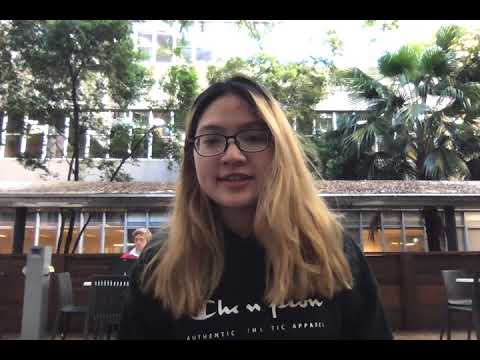

In [0]:
#@Machine Learning Assessment 2 Video Pitch { display-mode: "form" }
from IPython.display import YouTubeVideo
YouTubeVideo('0_uisMytaIY', width=600, height=400)

##**Appendix**

###References

Kunal, C. 'A-Z of Decision Trees', viewed 21 September 2019,  <https://medium.com/analytics-vidhya/part-2-a-z-decision-trees-f88d704968d1>

Obaidul, C., 'The Ethical Implications in the Application of Artificial Intelligence in Law', The Startup, viewed 20 September 2019, <https://medium.com/swlh/the-ethical-implications-in-the-application-of-artificial-intelligence-in-law-9906c16e3fa8>

Perner, P., 'Improving The Accuracy of Decision Tree Induction by Feature Pre-Selection', Aplied Artifical Intelligent 2001, vol. 15, no. 8, pp. 747 - 760, viewed 21 September 2019,  <http://www.ibai-institut.de/files/aai01.pdf> 

Zhixiao, A., 'Variable Reduction in SAS by Using Weight of Evidence and Information Value', SAS Global Forum 2013, viewed 23 September 2019, <http://support.sas.com/resources/papers/proceedings13/095-2013.pdf>

Zhou, V., 'A Simple Explanation of Gini Impurity', viewed 21 September 2019,  <https://victorzhou.com/blog/gini-impurity/>

###Link to Colab and github

Colab
      <https://colab.research.google.com/drive/1KvrYfOKdCXMV2JZKw_x9O_qgTc-3xYPb?authuser=3#scrollTo=Pd28tACSyNbd>

Github <https://github.com/MinhLe2502/UTS_ML2019_ID13005158/blob/master/A2.ipynb>

###Link to YouTUbe

Assessment 2 Video Pitch: https://www.youtube.com/watch?v=0_uisMytaIY